## Work
1. 請建立自己的deep neural network
2. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
3. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [3]:
import os
import keras
import tensorflow

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [4]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = tensorflow.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [6]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes=10)

In [7]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

In [9]:
optimizer = tensorflow.keras.optimizers.SGD(lr=0.001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optimizer)

# optimizer = tensorflow.keras.optimizers.Adam(lr=0.001)
# model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [10]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 10s 46ms/step - loss: 2.2590 - accuracy: 0.1562 - val_loss: 2.2024 - val_accuracy: 0.2172
Epoch 2/100
196/196 [==============================] - 9s 47ms/step - loss: 2.1735 - accuracy: 0.2234 - val_loss: 2.1403 - val_accuracy: 0.2473
Epoch 3/100
196/196 [==============================] - 8s 41ms/step - loss: 2.1196 - accuracy: 0.2496 - val_loss: 2.0932 - val_accuracy: 0.2708
Epoch 4/100
196/196 [==============================] - 8s 42ms/step - loss: 2.0771 - accuracy: 0.2685 - val_loss: 2.0548 - val_accuracy: 0.2830
Epoch 5/100
196/196 [==============================] - 9s 46ms/step - loss: 2.0416 - accuracy: 0.2845 - val_loss: 2.0223 - val_accuracy: 0.2968
Epoch 6/100
196/196 [==============================] - 8s 42ms/step - loss: 2.0115 - accuracy: 0.2954 - val_loss: 1.9947 - val_accuracy: 0.3064
Epoch 7/100
196/196 [==============================] - 8s 42ms/step - loss: 1.9857 - accuracy: 0.3048 - val_loss: 1.9718 - val_accuracy

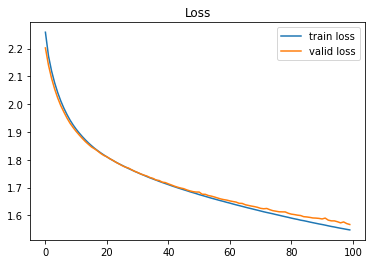

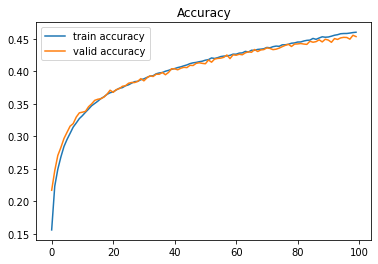

In [11]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()